In [15]:
import pandas as pd
import numpy as np
import sklearn.preprocessing
from matplotlib import pyplot as plt
from sklearn import cluster
import kneed

data = pd.read_csv("./Country-data.csv")
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [16]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [17]:
scaler = sklearn.preprocessing.MinMaxScaler()

data_without_countries = data.drop(["country"], axis=1)
normalized_data = scaler.fit_transform(data_without_countries)
normalized_data = pd.DataFrame(normalized_data, columns=data_without_countries.columns)
normalized_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [18]:
selected_data = normalized_data[["income", "gdpp", "child_mort"]]
selected_data

,income,gdpp,child_mort
0,0.008047,0.003073,0.426485
1,0.074933,0.036833,0.068160
2,0.098809,0.040365,0.120253
3,0.042535,0.031488,0.566699
4,0.148652,0.114242,0.037488
...,...,...,...
162,0.018820,0.026143,0.129503
163,0.127750,0.126650,0.070594
164,0.031200,0.010299,0.100779
165,0.031120,0.010299,0.261441


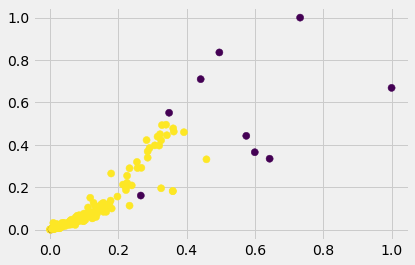

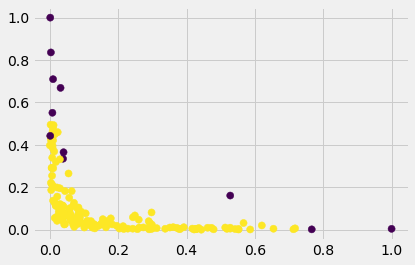

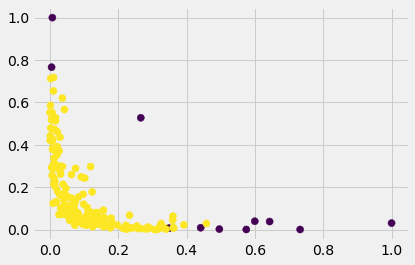

In [19]:
data_dbscan = sklearn.cluster.DBSCAN(eps=0.20, min_samples=30).fit_predict(selected_data)
plt.scatter(selected_data["income"], selected_data["gdpp"], c=data_dbscan, s=50)
plt.show()
plt.scatter(selected_data["child_mort"], selected_data["gdpp"], c=data_dbscan, s=50)
plt.show()
plt.scatter(selected_data["income"], selected_data["child_mort"], c=data_dbscan, s=50)
plt.show()

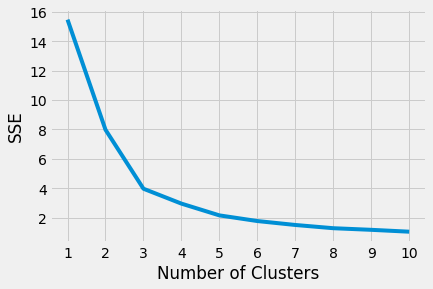

In [20]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(selected_data)
    sse.append(kmeans.inertia_)

plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [22]:
kl = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
num_of_clusters = kl.elbow
num_of_clusters


3

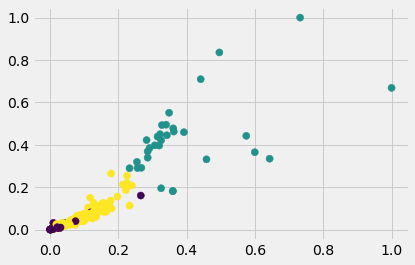

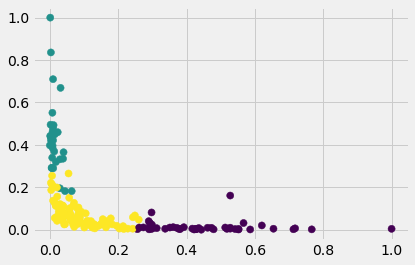

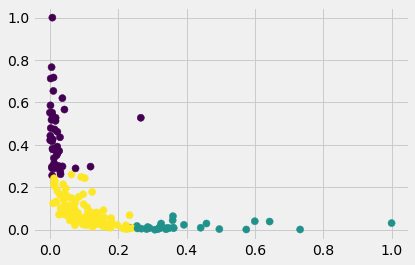

In [23]:
gdp_kmeans_labels = cluster.KMeans(num_of_clusters).fit_predict(selected_data)
plt.scatter(selected_data["income"], selected_data["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(selected_data["child_mort"], selected_data["gdpp"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(selected_data["income"], selected_data["child_mort"], c=gdp_kmeans_labels,
            s=50, cmap='viridis')
plt.show()

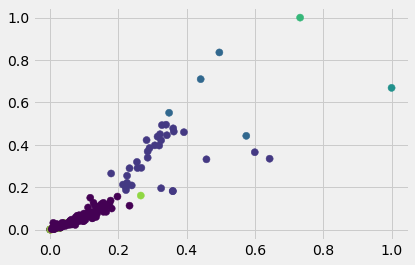

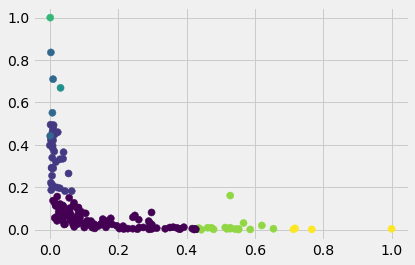

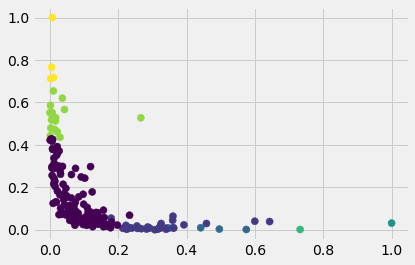

In [24]:
gdp_meanshift_labels = cluster.MeanShift().fit_predict(selected_data)
plt.scatter(selected_data["income"], selected_data["gdpp"], c=gdp_meanshift_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(selected_data["child_mort"], selected_data["gdpp"], c=gdp_meanshift_labels,
            s=50, cmap='viridis')
plt.show()
plt.scatter(selected_data["income"], selected_data["child_mort"], c=gdp_meanshift_labels,
            s=50, cmap='viridis')
plt.show()

In [25]:
clustered_income_gdpp = selected_data.copy()
clustered_income_gdpp["cluster"] = gdp_meanshift_labels
clustered_income_gdpp

,income,gdpp,child_mort,cluster
0,0.008047,0.003073,0.426485,0
1,0.074933,0.036833,0.068160,0
2,0.098809,0.040365,0.120253,0
3,0.042535,0.031488,0.566699,5
4,0.148652,0.114242,0.037488,0
...,...,...,...,...
162,0.018820,0.026143,0.129503,0
163,0.127750,0.126650,0.070594,0
164,0.031200,0.010299,0.100779,0
165,0.031120,0.010299,0.261441,0


In [27]:
coefs = np.array([4, 3, 5])

cluster_grouped = clustered_income_gdpp.groupby(["cluster"], as_index=False).mean()
cluster_grouped["score"] = cluster_grouped.apply(lambda row: 1 / np.dot(row.drop("cluster").to_numpy(), coefs), axis=1)
cluster_grouped.sort_values(by=["score"])

,cluster,income,gdpp,child_mort,score
3,3,1.000000,0.668795,0.031159,0.162280
4,4,0.732296,1.000000,0.000974,0.168519
6,6,0.006234,0.003532,0.799172,0.248053
2,2,0.465194,0.634911,0.005112,0.263778
5,5,0.028625,0.016586,0.528266,0.356431
1,1,0.317173,0.337083,0.015914,0.423816
0,0,0.073571,0.046345,0.150578,0.843023


In [37]:
clustered_income_gdpp["country"] = data["country"]
clustered_income_gdpp[clustered_income_gdpp["cluster"] == 3]

,income,gdpp,child_mort,cluster,country
123,1.0,0.668795,0.031159,3,Qatar


In [39]:
clustered_income_gdpp[clustered_income_gdpp["cluster"] == 6]

,income,gdpp,child_mort,cluster,country
31,0.002243,0.002052,0.712756,6,Central African Republic
32,0.010620,0.006357,0.717624,6,Chad
66,0.007163,0.004114,1.000000,6,Haiti
132,0.004912,0.001604,0.766310,6,Sierra Leone
